In [65]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from abnumber import Chain
from Bio import SeqIO
import re

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [205]:
sites = pd.read_csv('../../data/tasks/ptm_mitigation/ptm_sites.tsv', sep='\t', index_col=0)
sites.head()

,motif,n,raw_pos,kabat_pos,imgt_pos,in_germline,region,chain_type,inn_number,seq_id,germline_gene,germline_family,antibody,species,seq
site1,DG,N,54,H54,H62,False,CDR2,H,8659,8659_seq1,IGHV1-3*01,IGHV1,abagovomab,Mouse,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...
site2,DG,N+1,55,H55,H63,True,CDR2,H,8659,8659_seq1,IGHV1-3*01,IGHV1,abagovomab,Mouse,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...
site3,DG,N,53,H54,H59,False,CDR2,H,10745,10745_seq1,IGHV2-26*01,IGHV2,abrezekimab,Humanized,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...
site4,DG,N+1,54,H55,H63,False,CDR2,H,10745,10745_seq1,IGHV2-26*01,IGHV2,abrezekimab,Humanized,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...
site5,DG,N,97,H95,H107,False,CDR3,H,10745,10745_seq1,IGHV2-26*01,IGHV2,abrezekimab,Humanized,QVTLKESGPVLVKPTETLTLTCTVSGFSLTNYHVQWIRQPPGKALE...


In [170]:
orig_oasis = pd.read_excel('../../data/tasks/ptm_mitigation/ptm_seqs_orig_oasis.xlsx', sheet_name=None)

In [180]:
def get_oasis_mean_subjects(site, oasis_sheets):
    if site.name not in oasis_sheets:
        print('Site not available, using NaN:', site.name)
        return np.nan
    sheet = oasis_sheets[site.name]
    start = max(0, site['raw_pos']-3)
    end = min(len(sheet), site['raw_pos']+5)
    scores = sheet.loc[start:end]
    return scores['Peptide Fraction OAS Subjects'].mean()

In [172]:
orig_subjects = sites.apply(get_oasis_mean_subjects, oasis_sheets=orig_oasis, axis=1)
orig_subjects.head()

site1    0.000988
site2    0.000988
site3    0.000988
site4    0.000000
site5    0.165432
dtype: float64

<AxesSubplot:ylabel='species'>

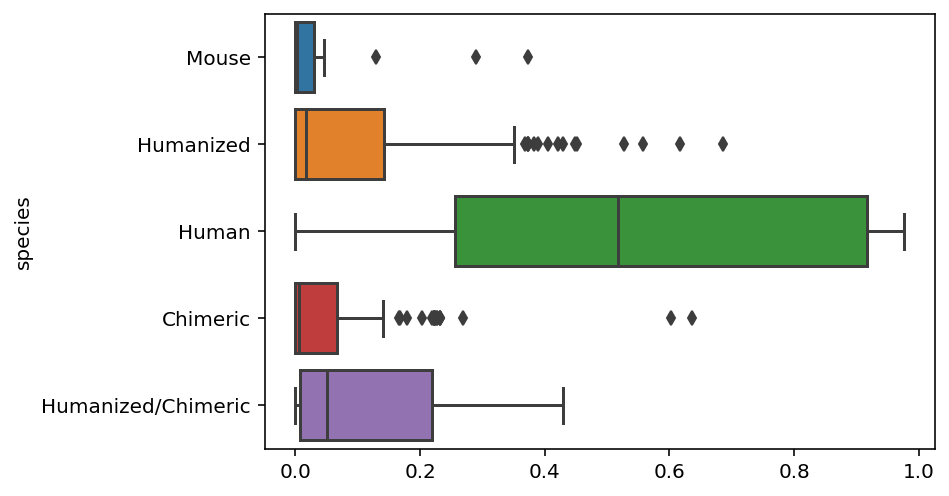

In [173]:
sns.boxplot(
    x=orig_subjects,
    y=sites['species']
)

## Sapiens mutants

In [174]:
sapiens_mutants_oasis = pd.read_excel('../../data/tasks/ptm_mitigation/mutants_sapiens_oasis.xlsx', sheet_name=None)

In [175]:
sapiens_subjects = sites.apply(get_oasis_mean_subjects, oasis_sheets=sapiens_mutants_oasis, axis=1)
sapiens_subjects.head()

site1    0.000988
site2    0.001975
site3    0.000000
site4    0.000000
site5    0.148148
dtype: float64

<AxesSubplot:ylabel='species'>

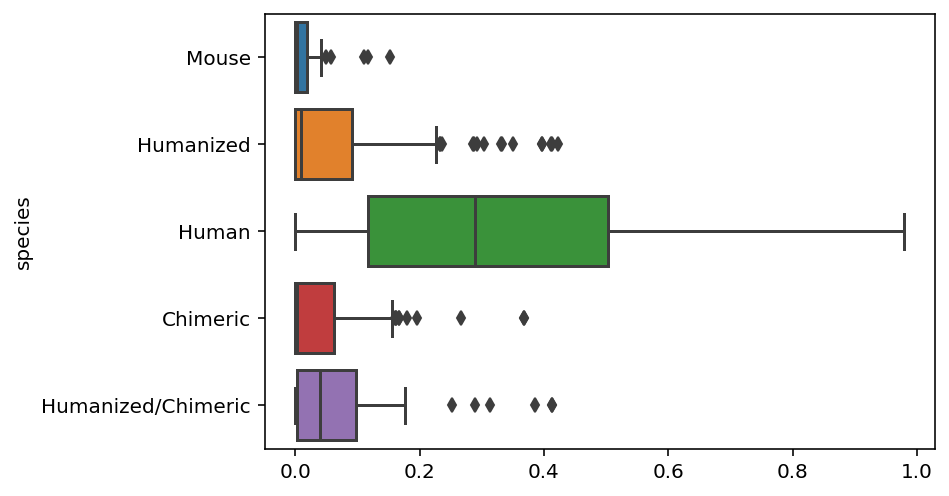

In [176]:
sns.boxplot(
    x=sapiens_subjects,
    y=sites['species']
)

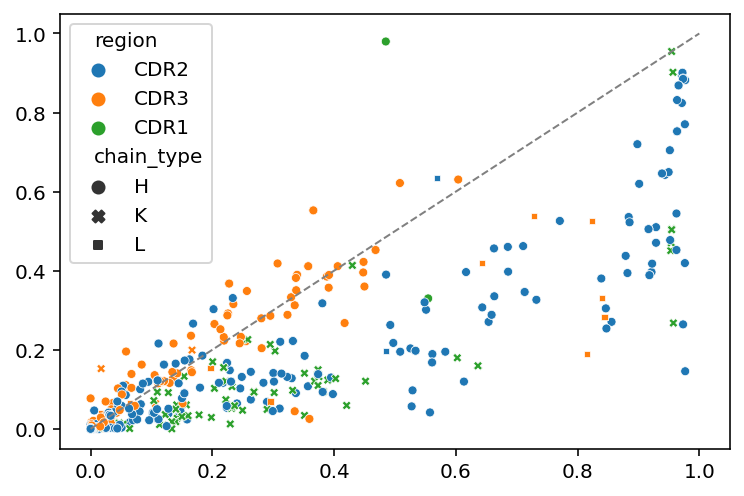

In [177]:
ax = sns.scatterplot(
    x=orig_subjects,
    y=sapiens_subjects,
    style=sites['chain_type'],
    hue=sites['region'],
    s=20
)
ax.plot([0, 1], [0, 1], ls='--', lw=1, color='grey');

## Frequency mutants

In [178]:
frequency_mutants_oasis = pd.read_excel('../../data/tasks/ptm_mitigation/mutants_frequency_oasis.xlsx', sheet_name=None)

In [181]:
frequency_subjects = sites.apply(get_oasis_mean_subjects, oasis_sheets=frequency_mutants_oasis, axis=1)
frequency_subjects.head()

Site not available, using NaN: site69
Site not available, using NaN: site70
Site not available, using NaN: site75
Site not available, using NaN: site76
Site not available, using NaN: site95
Site not available, using NaN: site96
Site not available, using NaN: site107
Site not available, using NaN: site108
Site not available, using NaN: site115
Site not available, using NaN: site116
Site not available, using NaN: site205
Site not available, using NaN: site206
Site not available, using NaN: site353
Site not available, using NaN: site354
Site not available, using NaN: site359
Site not available, using NaN: site360
Site not available, using NaN: site379
Site not available, using NaN: site380
Site not available, using NaN: site459
Site not available, using NaN: site460
Site not available, using NaN: site503
Site not available, using NaN: site504
Site not available, using NaN: site529
Site not available, using NaN: site530
Site not available, using NaN: site605
Site not available, using NaN: 

site1    0.000988
site2    0.001975
site3    0.000000
site4    0.000000
site5    0.131358
dtype: float64

<AxesSubplot:ylabel='species'>

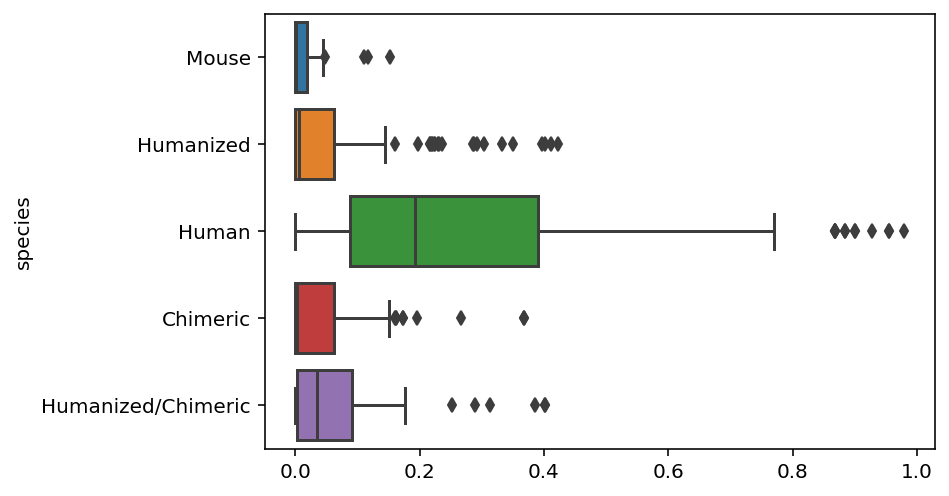

In [182]:
sns.boxplot(
    x=frequency_subjects,
    y=sites['species']
)

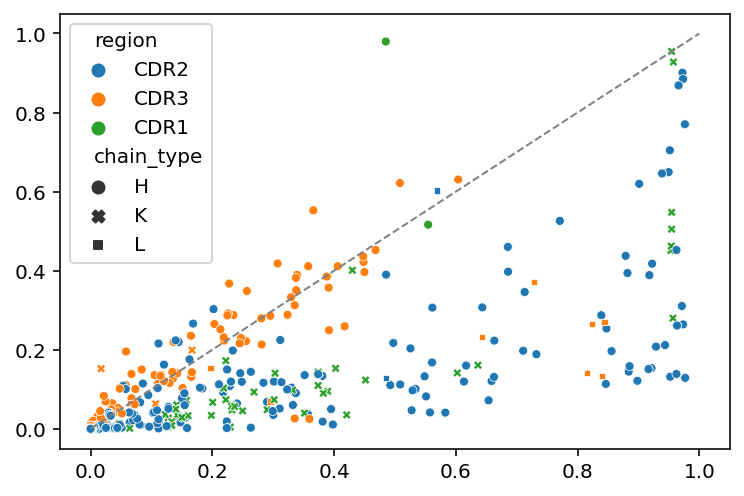

In [183]:
ax = sns.scatterplot(
    x=orig_subjects,
    y=frequency_subjects,
    style=sites['chain_type'],
    hue=sites['region'],
    s=20
)
ax.plot([0, 1], [0, 1], ls='--', lw=1, color='grey');

## Random mutants

In [193]:
random_mutants_oasis = pd.read_excel('../../data/tasks/ptm_mitigation/mutants_random_oasis.xlsx', sheet_name=None)

In [194]:
random_subjects = sites.apply(get_oasis_mean_subjects, oasis_sheets=random_mutants_oasis, axis=1)
random_subjects.head()

site1    0.000988
site2    0.000000
site3    0.000000
site4    0.000000
site5    0.082469
dtype: float64

<AxesSubplot:ylabel='species'>

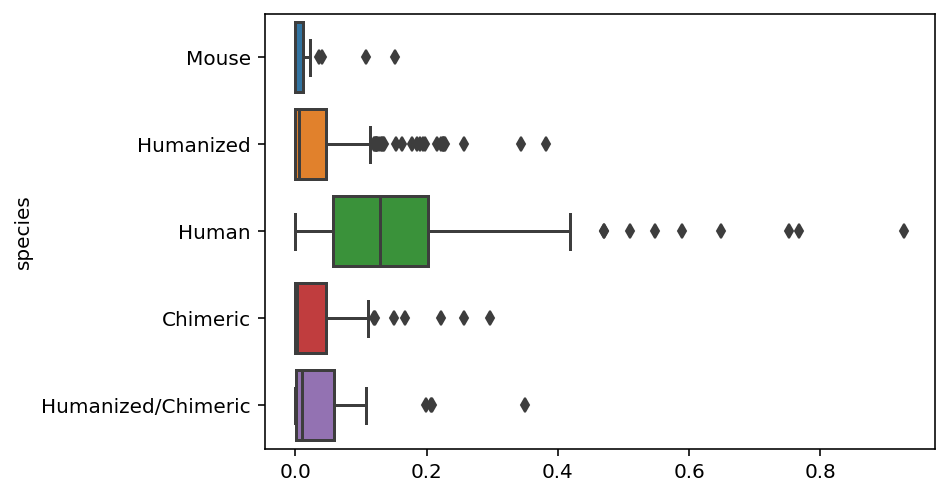

In [195]:
sns.boxplot(
    x=random_subjects,
    y=sites['species']
)

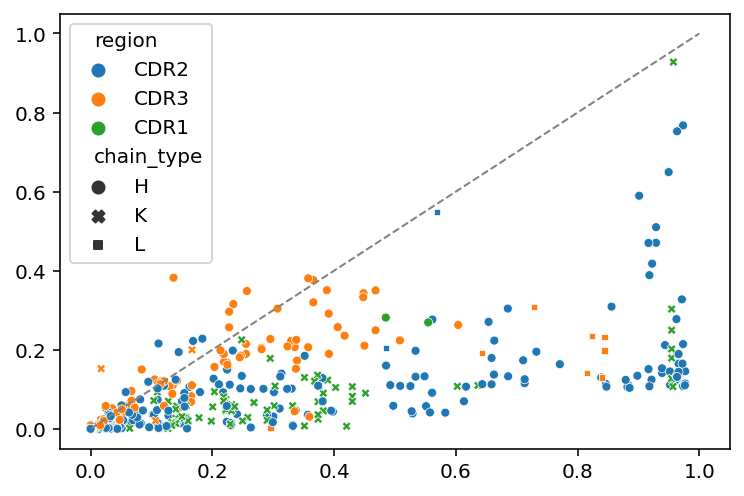

In [196]:
ax = sns.scatterplot(
    x=orig_subjects,
    y=random_subjects,
    style=sites['chain_type'],
    hue=sites['region'],
    s=20
)
ax.plot([0, 1], [0, 1], ls='--', lw=1, color='grey');

In [245]:
subjects = pd.DataFrame({
    'Original': orig_subjects,
    'Sapiens': sapiens_subjects,
    'Frequency': frequency_subjects,
    'Random': random_subjects
}).melt(var_name='Method', value_name='OASis identity', ignore_index=False)
subjects['Species'] = sites['species']
subjects['Region'] = sites['region']
subjects['N'] = sites['n']
subjects['Germline'] = sites['in_germline'].replace({True: 'Germline', False: 'Non-germline'})
subjects['Chain'] = sites['chain_type'].apply(lambda c: 'Heavy' if c == 'H' else 'Light')
subjects.head()

,Method,OASis identity,Species,Region,N,Germline,Chain
site1,Original,0.000988,Mouse,CDR2,N,Non-germline,Heavy
site2,Original,0.000988,Mouse,CDR2,N+1,Germline,Heavy
site3,Original,0.000988,Humanized,CDR2,N,Non-germline,Heavy
site4,Original,0.000000,Humanized,CDR2,N+1,Non-germline,Heavy
site5,Original,0.165432,Humanized,CDR3,N,Non-germline,Heavy


<AxesSubplot:xlabel='OASis identity', ylabel='Species'>

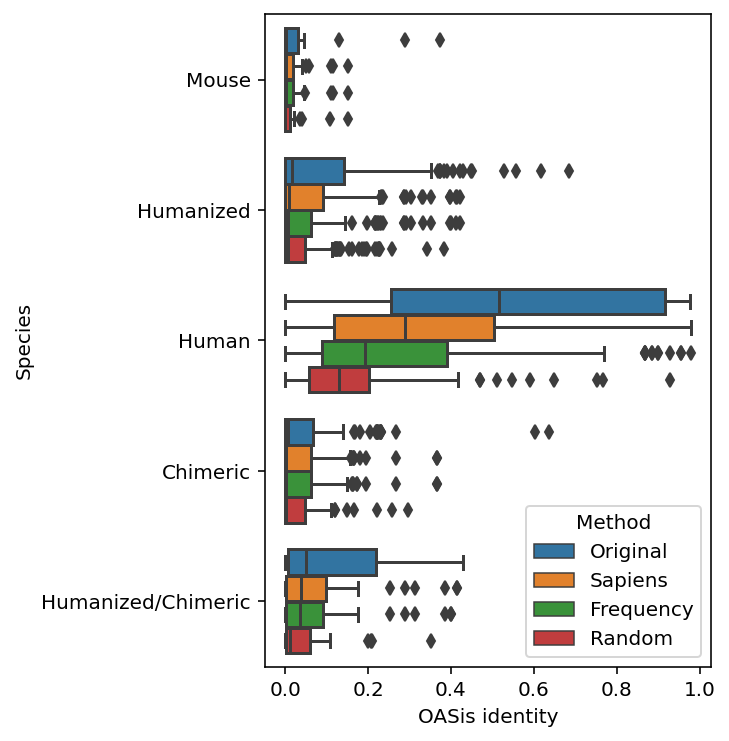

In [224]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(
    data=subjects,
    x='OASis identity',
    y='Species',
    hue='Method',
    ax=ax
)

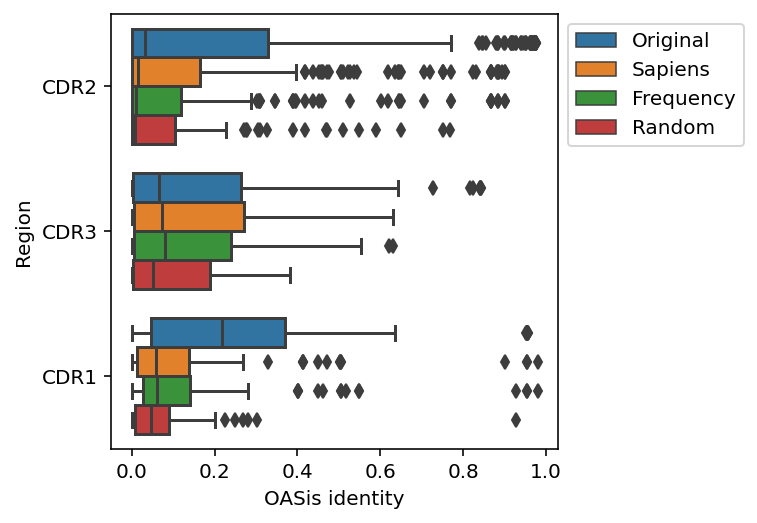

In [225]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subjects,
    x='OASis identity',
    y='Region',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

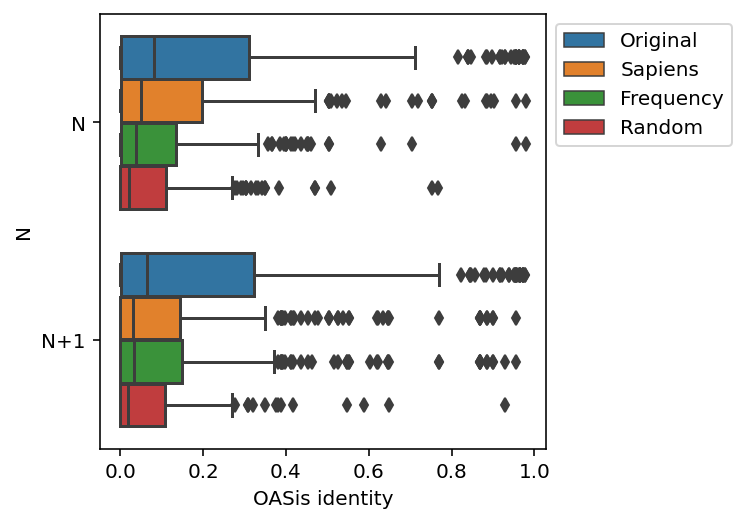

In [226]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subjects,
    x='OASis identity',
    y='N',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

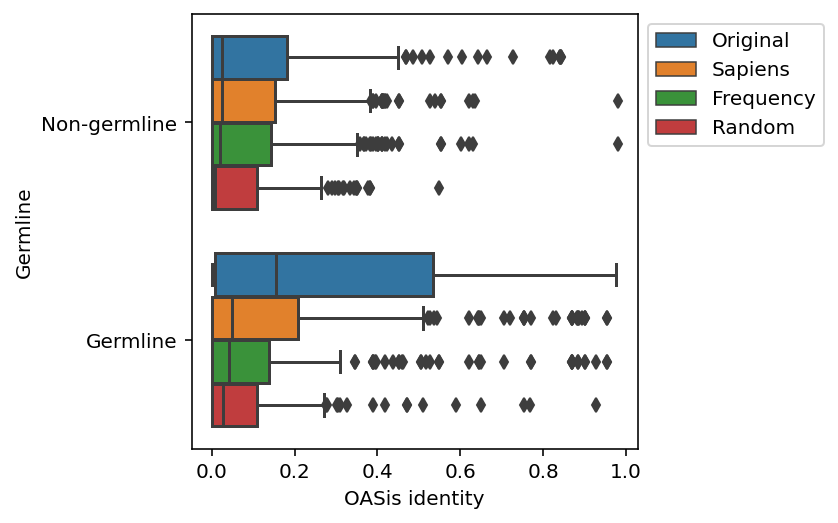

In [230]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subjects,
    x='OASis identity',
    y='Germline',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

<AxesSubplot:>

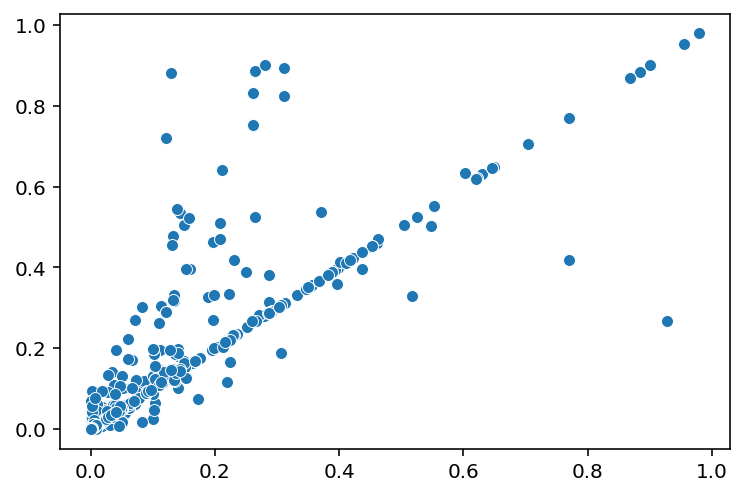

In [243]:
sns.scatterplot(
    x=frequency_subjects,
    y=sapiens_subjects
)

In [247]:
(sapiens_subjects == 0).mean()

0.24115755627009647

In [248]:
(frequency_subjects == 0).mean()

0.24437299035369775

In [231]:
subject_change = pd.DataFrame({
    'Sapiens': sapiens_subjects-orig_subjects,
    'Frequency': frequency_subjects-orig_subjects,
    'Random': random_subjects-orig_subjects
}).melt(var_name='Method', value_name='OASis change', ignore_index=False)
subject_change['Species'] = sites['species']
subject_change['Region'] = sites['region']
subject_change['N'] = sites['n']
subject_change['Germline'] = sites['in_germline'].replace({True: 'Germline', False: 'Non-germline'})
subject_change['Chain'] = sites['chain_type'].apply(lambda c: 'Heavy' if c == 'H' else 'Light')
subject_change.head()

,Method,OASis change,Species,Region,N,Germline,Chain
site1,Sapiens,0.000000,Mouse,CDR2,N,Non-germline,Heavy
site2,Sapiens,0.000988,Mouse,CDR2,N+1,Germline,Heavy
site3,Sapiens,-0.000988,Humanized,CDR2,N,Non-germline,Heavy
site4,Sapiens,0.000000,Humanized,CDR2,N+1,Non-germline,Heavy
site5,Sapiens,-0.017284,Humanized,CDR3,N,Non-germline,Heavy


<AxesSubplot:xlabel='OASis change', ylabel='Species'>

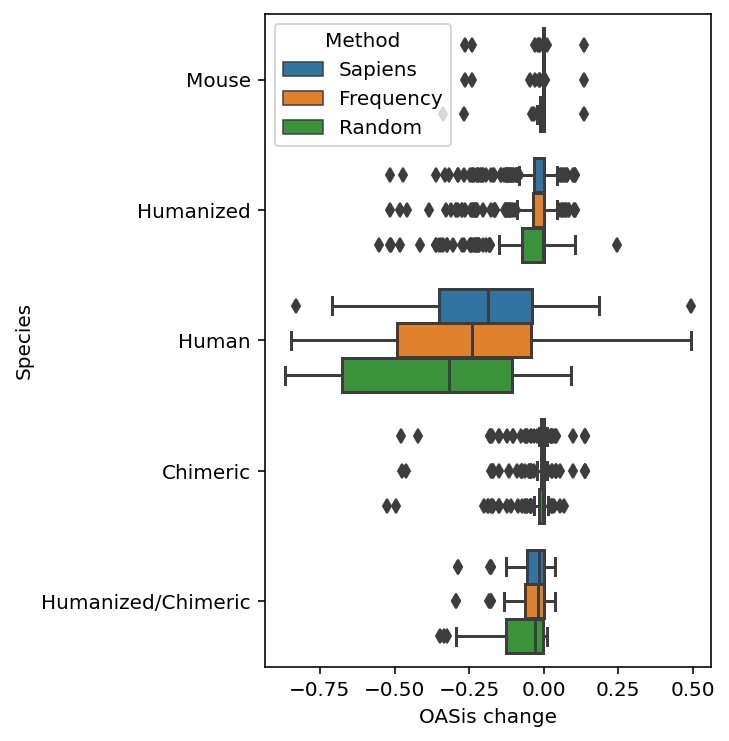

In [232]:
fig, ax = plt.subplots(figsize=(4, 6))
sns.boxplot(
    data=subject_change,
    x='OASis change',
    y='Species',
    hue='Method',
    ax=ax
)

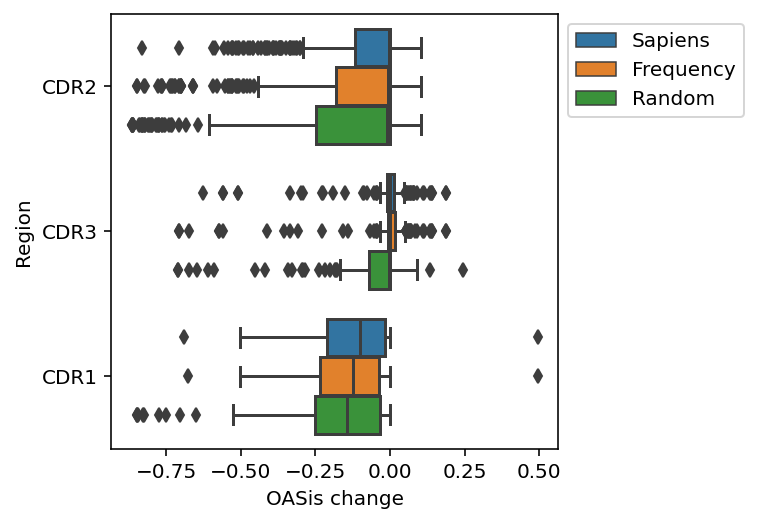

In [233]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subject_change,
    x='OASis change',
    y='Region',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

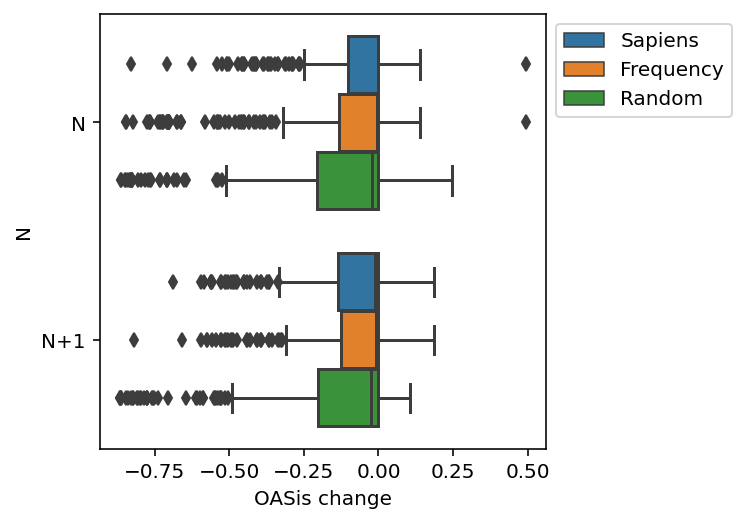

In [234]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subject_change,
    x='OASis change',
    y='N',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

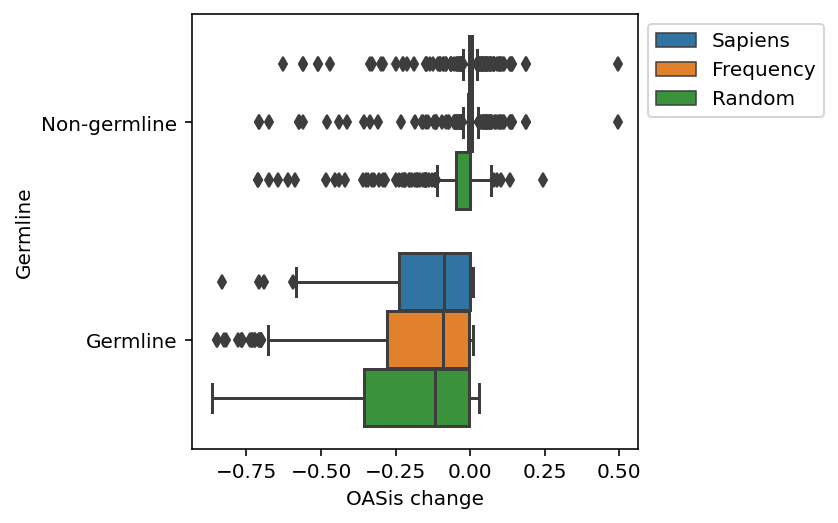

In [235]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(
    data=subject_change,
    x='OASis change',
    y='Germline',
    hue='Method',
    ax=ax
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [237]:
subject_change.groupby('Method').mean()

,OASis change
Method,
Frequency,-0.107090
Random,-0.145394
Sapiens,-0.080991


In [240]:
subject_change.groupby(['Species', 'Method']).mean().unstack()

OASis change                    
Method                Frequency    Random   Sapiens
Species                                            
Chimeric              -0.019352 -0.030214 -0.019185
Human                 -0.275654 -0.380784 -0.203795
Humanized             -0.039419 -0.055249 -0.035491
Humanized/Chimeric    -0.046660 -0.073465 -0.039886
Mouse                 -0.017880 -0.023713 -0.016503

<AxesSubplot:>

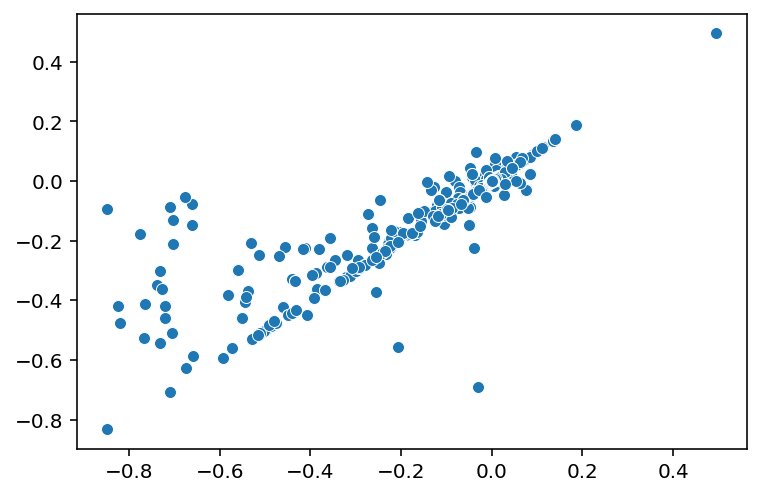

In [246]:
sns.scatterplot(
    x=frequency_subjects-orig_subjects,
    y=sapiens_subjects-orig_subjects
)